In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn


In [2]:
song_data = pd.read_csv(r"song_data.csv")
onk_song = pd.read_csv(r"10000.txt", sep='\t', header=None, names=['user','song','play_count'])

In [3]:
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [4]:
onk_song.head()

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [4]:
merged_data = pd.merge(onk_song, 
                       song_data, how='left', 
                       left_on='song', 
                       right_on='song_id')
merged_data.rename(columns={'play_count':'listen_count'},inplace=True)
del(merged_data['song_id'])

In [5]:
merged_data.head()

,user,song,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005


### Overview Dataset

In [6]:
merged_data_cleaned=merged_data.drop(["release","artist_name"],axis=1)

In [8]:
merged_data_cleaned

,user,song,listen_count,title,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,2005
...,...,...,...,...,...
2086941,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),0
2086942,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,2009
2086943,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),2007
2086944,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,2010


In [9]:
merged_data_cleaned.user.nunique()

76353

In [10]:
merged_data_cleaned.shape

(2086946, 5)

In [7]:
merged_data_cleaned.isna().sum()

user            0
song            0
listen_count    0
title           0
year            0
dtype: int64

### Let's solve the 0 problem in the year 

In [8]:
merged_data_cleaned[merged_data_cleaned.year==0]

,user,song,listen_count,title,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,0
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,0
12,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOIZAZL12A6701C53B,5,I'll Be Missing You (Featuring Faith Evans & 1...,0
14,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOJPFQG12A58A7833A,1,Clarity,0
15,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOKRIMP12A6D4F5DA3,5,I?'m A Steady Rollin? Man,0
...,...,...,...,...,...
2086899,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOBOUPA12A6D4F81F1,7,Sincerité Et Jalousie,0
2086909,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SODJWHY12A8C142CCE,2,Hey_ Soul Sister,0
2086922,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOFRQTD12A81C233C0,9,Sehr kosmisch,0
2086924,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOGGPKT12A8C1424BE,1,Into The Night,0


In [9]:
merged_data_cleaned["no_year"]=False

In [10]:
merged_data_cleaned.head()

,user,song,listen_count,title,year,no_year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,0,False
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,1976,False
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,2007,False
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,2007,False
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,2005,False


In [11]:
merged_data_cleaned["no_year"]=merged_data_cleaned.year==0

### IQR- Let's save ourself from outliers

In [12]:
numerical_columns=merged_data_cleaned.select_dtypes(include=np.number).columns.tolist()
numerical_columns

['listen_count', 'year']

In [13]:
numerical_columns.remove('year')
numerical_columns

['listen_count']

In [14]:
sparse_columns=[]
for col in numerical_columns:
    if (merged_data_cleaned[col].quantile(0.01)==merged_data_cleaned[col].quantile(0.25)==merged_data_cleaned[col].mode()[0]):
        sparse_columns.append(col)

sparse_columns_2=[]
for col in numerical_columns:
    if (merged_data_cleaned[col].quantile(0.01)==merged_data_cleaned[col].quantile(0.25)):
        sparse_columns_2.append(col)

In [15]:
len(numerical_columns), len(sparse_columns), len(sparse_columns_2)

(1, 1, 1)

In [16]:
def HardEdgeReduction(df,numerical_columns,sparse_columns,upper_quantile=0.99,lower_quantile=0.01):
    
    import pandas as pd

    import psutil, os, gc, time
    print("HardEdgeReduction process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()
    
    # Do outlier cleaning in only one loop
    epsilon = 0.0001 # for zero divisions

    # Define boundaries that we will use for Reduction operation

    df_outlier_cleaned = df.copy()

    print("Detected outliers will be replaced with edged quantiles/percentiles: 1% and 99%!\n")
    print("Total number of rows is: %s\n"%df_outlier_cleaned.shape[0])

    outlier_boundries_dict={}
#     lower_bound_sparse=[]
#     upper_bound_sparse=[]

    for col in numerical_columns:

        if col in sparse_columns:

            # First ignore the 'sparse' data points:
            nonsparse_data = pd.DataFrame(df_outlier_cleaned[df_outlier_cleaned[col] !=\
                                                             df_outlier_cleaned[col].mode()[0]][col]) 
            
            #we used only mode to catch sparse points, since we know/proved it is enough to do that.

            # Find Outlier Thresholds:
            # Note: All columns are right-skewed
            # For lower threshold (left-hand-side)
            if nonsparse_data[col].quantile(lower_quantile) < df_outlier_cleaned[col].mode()[0]: #Unexpected case
                lower_bound_sparse = nonsparse_data[col].quantile(lower_quantile)
            else:
                lower_bound_sparse = df_outlier_cleaned[col].mode()[0]
            
            # For upper threshold (right-hand-side)
            if nonsparse_data[col].quantile(upper_quantile) < df_outlier_cleaned[col].mode()[0]: #Unexpected case
                upper_bound_sparse = df_outlier_cleaned[col].mode()[0]
            else:
                upper_bound_sparse = nonsparse_data[col].quantile(upper_quantile)

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)

            # Inform user about the cardinality of Outlier existence:
            number_of_outliers = len(df_outlier_cleaned[(df_outlier_cleaned[col] < lower_bound_sparse) |\
                                                        (df_outlier_cleaned[col] > upper_bound_sparse)][col])
            print("Sparse: Outlier number in {} is equal to: ".format(col),number_of_outliers/(nonsparse_data.shape[0] -
                                                                                       nonsparse_data.isnull().sum()))

            # Replace Outliers with Edges --> 1% and 99%:
            if number_of_outliers > 0:

                # Replace 'left-hand-side' outliers with its 1% quantile value
                df_outlier_cleaned.loc[df_outlier_cleaned[col] < lower_bound_sparse,col] = lower_bound_sparse - epsilon # --> MAIN DF CHANGED

                # Replace 'right-hand-side' outliers with its 99% quantile value
                df_outlier_cleaned.loc[df_outlier_cleaned[col] > upper_bound_sparse,col] = upper_bound_sparse + epsilon # --> MAIN DF CHANGED

        else:
            # Find Edges:
            number_of_outliers = len(df_outlier_cleaned[(df_outlier_cleaned[col] < \
                                                         df_outlier_cleaned[col].quantile(lower_quantile))|\
                                                        (df_outlier_cleaned[col] > \
                                                         df_outlier_cleaned[col].quantile(upper_quantile))]\
                                     [col])
            print("Other: Outlier number in {} is equal to: ".format(col),number_of_outliers/(df[col].shape[0] -
                                                                                       df[col].isnull().sum())) 

            # Replace 'Standard' outliers:
            if number_of_outliers > 0:
                # Replace all outliers with its %99 quartile
                lower_bound_sparse = df_outlier_cleaned[col].quantile(lower_quantile)
                df_outlier_cleaned.loc[df_outlier_cleaned[col] < \
                                       lower_bound_sparse,col] \
                = lower_bound_sparse  - epsilon

                upper_bound_sparse = df_outlier_cleaned[col].quantile(upper_quantile)
                df_outlier_cleaned.loc[df_outlier_cleaned[col] > \
                                       upper_bound_sparse,col] \
                = upper_bound_sparse  + epsilon

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)


    print('HardEdgeReduction process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return df_outlier_cleaned, outlier_boundries_dict


In [17]:
 merged_data_cleaned, outlier_boundries_dict = HardEdgeReduction(merged_data_cleaned,numerical_columns,sparse_columns)

HardEdgeReduction process has began:

Detected outliers will be replaced with edged quantiles/percentiles: 1% and 99%!

Total number of rows is: 2086946

Sparse: Outlier number in listen_count is equal to:  listen_count    0.009484
dtype: float64
HardEdgeReduction process has been completed!
--- in 0.006423572699228923 minutes ---


In [18]:
outlier_boundries_dict

{'listen_count': (1, 39.0)}

In [19]:
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086946 entries, 0 to 2086945
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user          object 
 1   song          object 
 2   listen_count  float64
 3   title         object 
 4   year          int64  
 5   no_year       bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 97.5+ MB


### Let's drop duplicates

In [20]:
merged_data_cleaned=merged_data_cleaned.drop_duplicates()


In [21]:
merged_data_cleaned.shape

(2015999, 6)

In [22]:
merged_data_cleaned_1=merged_data_cleaned.year!=0

In [23]:
merged_data_cleaned_1=merged_data_cleaned[merged_data_cleaned_1]

In [24]:
merged_data_cleaned_1

,user,song,listen_count,title,year,no_year
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,Entre Dos Aguas,1976,False
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,2007,False
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0,Constellations,2005,False
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0,Learn To Fly,1999,False
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5.0,Apuesta Por El Rock 'N' Roll,2007,False
...,...,...,...,...,...,...
2086940,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOIOESO12A6D4F621D,4.0,Unwell (Album Version),2003,False
2086942,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4.0,Two Is Better Than One,2009,False
2086943,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3.0,What I've Done (Album Version),2007,False
2086944,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1.0,Up,2010,False


In [29]:
merged_data_cleaned=merged_data_cleaned_1.copy()

In [30]:
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640946 entries, 1 to 2086945
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   user          1640946 non-null  object 
 1   song          1640946 non-null  object 
 2   listen_count  1640946 non-null  float64
 3   title         1640946 non-null  object 
 4   year          1640946 non-null  int64  
 5   no_year       1640946 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 76.7+ MB


In [31]:
merged_data_cleaned.year.min()

1954

In [25]:
import ipywidgets as widgets
@widgets.interact_manual(
    Year = range(1954,2011))
def plot(Year = 2020):
    arpop = merged_data_cleaned[merged_data_cleaned['year'] == Year]
    arpop = pd.DataFrame(arpop.groupby('title')['listen_count'].sum()).sort_values('listen_count').tail(10).reset_index()
    fig = plt.figure(figsize=(15,5))
    plt.bar( arpop['title'],
             arpop['listen_count'],
             width=0.45,
             color = ['#caf0f8','#ade8f4','#90e0ef','#48cae4','#00b4d8','#0096c7','#0077b6','#023e8a','#03045e','#14213d'])
#     ax = df.plot(kind='barh', 
#           figsize = (8, 5), 
#           width = 0.5,
#           color='#75daad')
    plt.xticks(rotation=45,ha='right')
    t='Top 10 Most Popular Songs from '+str(Year)
    plt.title(t,y=1.1,fontsize=20)
    plt.xlabel('title')
    plt.ylabel('listen_count (Ranges from 0 to 100)')


interactive(children=(Dropdown(description='Year', options=(1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 19…

## Creating mapping for users and songs

* We will have weigts associated with users and songs, and we will take corresponding ones and feed them to the model.
* But to do that, we should create mapping for songs and users so that when we want to take weights at specific index, we will use mapped values

In [26]:
d_song = {}
for i, e in enumerate(merged_data_cleaned["song"].unique()):  #İNDEX VE DEĞER Döndürür
    d_song[e] = i

In [27]:
d_song

{'SOAKIMP12A8C130995': 0,
 'SOBBMDR12A8C13253B': 1,
 'SOBXHDL12A81C204C0': 2,
 'SOBYHAJ12A6701BF1D': 3,
 'SODACBL12A8C13C273': 4,
 'SODDNQT12A6D4F5F7E': 5,
 'SODXRTY12AB0180F3B': 6,
 'SOFGUAY12AB017B0A8': 7,
 'SOFRQTD12A81C233C0': 8,
 'SOHQWYZ12A6D4FA701': 9,
 ...}

In [28]:
d_user = {}
for i, e in enumerate(merged_data_cleaned["user"].unique()):
    d_user[e] = i

In [29]:
d_user

{'b80344d063b5ccb3212f76538f3d9e43d87dca9e': 0,
 '85c1f87fea955d09b4bec2e36aee110927aedf9a': 1,
 'bd4c6e843f00bd476847fb75c47b4fb430a06856': 2,
 '8937134734f869debcab8f23d77465b4caaa85df': 3,
 '969cc6fb74e076a68e36a04409cb9d3765757508': 4,
 '4bd88bfb25263a75bbdd467e74018f4ae570e5df': 5,
 'e006b1a48f466bf59feefed32bec6494495a4436': 6,
 '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec': 7,
 '9bb911319fbc04f01755814cb5edb21df3d1a336': 8,
 'b64cdd1a0bd907e5e00b39e345194768e330d652': 9,
 '17aa9f6dbdf753831da8f38c71b66b64373de613': 10,
 'd6589314c0a9bcbca4fee0c93b14bc402363afea': 11,
 '5a905f000fc1ff3df7ca807d57edb608863db05d': 12,
 'c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1': 13,
 '45544491ccfcdc0b0803c34f201a6287ed4e30f8': 14,
 'ed7d4c476013b1c3dd91982b61494bf7436083ba': 15,
 'baf47ed8da24d607e50d8684cde78b923538640f': 16,
 '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf': 17,
 'a820d2d4f16bbd53be9e41e0417dfb234bfdfba8': 18,
 'bd8475385f0aa78830fa6dfce9e7242164b035c8': 19,
 '0afaa5d9d04bf85af720fe8cc566

In [30]:
merged_data_cleaned["user"] = merged_data_cleaned["user"].map(d_user)
#userid yerine dict teki indexler kullanılır
# bunlar mapping için kullanılır

In [31]:
merged_data_cleaned["song"] = merged_data_cleaned["song"].map(d_song)

In [32]:
merged_data_cleaned.sort_values(by=['song'])

,user,song,listen_count,title,year,no_year
0,0,0,1.0,The Cove,0,True
495434,18235,0,1.0,The Cove,0,True
401291,14796,0,2.0,The Cove,0,True
1321745,48591,0,1.0,The Cove,0,True
1604542,58867,0,1.0,The Cove,0,True
...,...,...,...,...,...,...
1105303,40728,9999,5.0,Baby [You've Got What It Takes] [with Sharon J...,2009,False
1154066,42502,9999,2.0,Baby [You've Got What It Takes] [with Sharon J...,2009,False
392942,14463,9999,1.0,Baby [You've Got What It Takes] [with Sharon J...,2009,False
1804842,66216,9999,4.0,Baby [You've Got What It Takes] [with Sharon J...,2009,False


In [33]:
class Dataset():
    def __init__(self, df): 
        self.df = df
        
    def __len__(self): 
        return len(self.df)
    
# index vererek ilerde weight lere ulaşmayı sağlıyor.  indexler tutulur   
    def __getitem__(self, idxs):
        df_sub = self.df.iloc[idxs]
        return (torch.tensor(df_sub["user"].values), torch.tensor(df_sub["song"].values)), torch.tensor(df_sub["listen_count"].values, dtype = torch.float32) 
            

In [34]:
class DataLoader():
    def __init__(self, ds, bs): 
        self.ds, self.bs = ds, bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)

        
        for i in range(0, n, self.bs): 
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]

# SPLIT

In [35]:
import numpy as np
import random


In [36]:
merged_data_cleaned.user

0              0
1              0
2              0
4              0
5              0
           ...  
2086941    76352
2086942    76352
2086943    76352
2086944    76352
2086945    76352
Name: user, Length: 2015999, dtype: int64

In [37]:
merged_data_cleaned2=merged_data_cleaned.sample(200000,random_state=42)
deneme=merged_data_cleaned.sample(32,random_state=11)
deneme

,user,song,listen_count,title,year,no_year
283735,10399,567,8.0,Parisian Goldfish,2008,False
275522,10105,4253,1.0,Sweet Jane,1970,False
1804869,66216,85,1.0,Without Me,2002,False
631760,23313,1523,1.0,Someday We'll Know,1998,False
1915786,70239,1123,1.0,Hero,2001,False
990982,36578,965,2.0,Whatcha Say,2009,False
1826920,67042,1501,1.0,Pojo Pojo,1998,False
1863209,68413,6511,3.0,You and Me,0,True
1787767,65551,9720,2.0,Everybody's Somebody's Fool,1972,False
1193036,43872,3541,1.0,Darkshines [Live From Le Zenith],0,True


In [38]:
merged_data_cleaned2.listen_count.value_counts()

1.0000     113911
2.0000      31194
3.0000      14505
5.0000       9206
4.0000       8112
6.0000       4568
7.0000       3123
8.0000       2221
10.0000      1874
9.0000       1719
11.0000      1248
12.0000      1008
39.0001       825
13.0000       815
15.0000       729
14.0000       635
16.0000       573
17.0000       477
18.0000       360
19.0000       335
20.0000       303
21.0000       262
22.0000       238
23.0000       199
25.0000       186
24.0000       158
28.0000       145
27.0000       140
26.0000       139
31.0000       105
30.0000        98
29.0000        92
32.0000        76
33.0000        71
35.0000        67
36.0000        63
39.0000        58
34.0000        57
37.0000        56
38.0000        49
Name: listen_count, dtype: int64

In [39]:
mask = [True if x == 1 else False for x in np.random.uniform(0, 1, (len(merged_data_cleaned2))) < 1 - 0.2] 
# yüzde 20 val,%80 train den küçükse True. train df'e mask olarak koyar,
# val için false un tersini alıp oluşturur
neg_mask = [not x for x in mask]

In [40]:
train_df, valid_df = merged_data_cleaned2[mask], merged_data_cleaned2[neg_mask]

In [41]:
train_ds = Dataset(train_df)
train_dl = DataLoader(train_ds, 1024) # batch size

In [42]:
valid_ds = Dataset(valid_df)
valid_dl = DataLoader(valid_ds, 1024)


In [43]:
deneme_ds = Dataset(deneme)
deneme_dl = DataLoader(deneme_ds, 32)

In [44]:
xb,yb=next(iter(train_dl))

# sigmoid

In [45]:
def sigmoid_range(x, low, high): 
    return torch.sigmoid(x) * (high-low) + low
# sigmoid range ayarlama

# Model 1

In [46]:
n_users = len(merged_data_cleaned["user"].unique())

n_songs = len(merged_data_cleaned["song"].unique())
n_years=len(merged_data_cleaned["year"].unique())
n_users,n_songs,n_years

(76353, 10000, 58)

In [47]:
class DotProductBias(nn.Module):
    def __init__(self, n_users, n_song, n_factors, y_range=(0,39.5)): #y_range:sigmoid range
        super().__init__()
        self.user_factors = nn.Parameter(torch.zeros(n_users, n_factors).normal_()) 
        self.user_bias = nn.Parameter(torch.zeros(n_users,1).normal_()) #latent fac. yok
        
        self.song_factors = nn.Parameter(torch.zeros(n_songs, n_factors).normal_())
        self.song_bias = nn.Parameter(torch.zeros(n_songs,1).normal_())
        
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors[x[0]]           #user indexi
        songs = self.song_factors[x[1]]
        
        res = (users * songs).sum(dim=1, keepdim=True)           #çarpımdan sonra bias ekleniyor
        res += self.user_bias[x[0]] + self.song_bias[x[1]]
        return sigmoid_range(res, *self.y_range)

In [48]:
model = DotProductBias(n_users, n_songs, 50) #latent fac. 50, çok fazla o yüzden pca
optim = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)

In [49]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("\nOptimizer's state_dict:")
for var_name in optim.state_dict():
    print(var_name, "\t", optim.state_dict()[var_name])

Model's state_dict:
user_factors 	 torch.Size([76353, 50])
user_bias 	 torch.Size([76353, 1])
song_factors 	 torch.Size([10000, 50])
song_bias 	 torch.Size([10000, 1])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0.001, 'amsgrad': False, 'params': [2685062986200, 2685062985984, 2685062986560, 2685062984832]}]


In [50]:
def mean_sqr(preds, targets):
    return ((preds.squeeze() - targets) ** 2).mean()

In [51]:
loss_func = mean_sqr

In [52]:
n_train = len(train_df)
n_train

160107

In [53]:
n_valid = len(valid_df)
n_valid

39893

In [54]:
def train(model, epochs=5, valid_epoch=5):
    for epoch in range(1, epochs+1):
        model = model.train()
        loss_train = 0
        loss_valid = 0
        for xb, yb in train_dl:
            
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            optim.step()
            optim.zero_grad()
            loss_train += loss * len(xb)
        predss=[]
        predss.append(preds)
        model_2=model
        if epoch  % valid_epoch == 0:
            model = model.eval() # degerlendirme/test modu. bash norm,droupout gibi degisiklik yapma 
            
            for xb, yb in valid_dl:
                with torch.no_grad(): #GRADYAN hesaplamasını istemiyoruz val.e bakarken
                    loss_valid += loss_func(model(xb), yb) * len(xb)
            print(f"training loss: {loss_train/n_train} | validation loss: {loss_valid/n_valid}")
        

In [55]:
train(model,64,2)

training loss: 0.41310635209083557 | validation loss: 0.6612922549247742
training loss: 0.11136103421449661 | validation loss: 0.5112476944923401
training loss: 0.05081385001540184 | validation loss: 0.3902038633823395
training loss: 0.02576315961778164 | validation loss: 0.2810751497745514
training loss: 0.017748018726706505 | validation loss: 0.19463397562503815
training loss: 0.016263285651803017 | validation loss: 0.1339501589536667
training loss: 0.016284817829728127 | validation loss: 0.09648096561431885
training loss: 0.016559185460209846 | validation loss: 0.07559472322463989
training loss: 0.016824260354042053 | validation loss: 0.06426773220300674
training loss: 0.01719372346997261 | validation loss: 0.058233000338077545
training loss: 0.01751423440873623 | validation loss: 0.05488825589418411
training loss: 0.01772027648985386 | validation loss: 0.05292754992842674
training loss: 0.0180826373398304 | validation loss: 0.051861703395843506
training loss: 0.018206482753157616 |

In [56]:
model.user_factors.shape

torch.Size([76353, 50])

In [57]:
xb,yb=next(iter(train_dl))

In [58]:
xb[0]

tensor([16338, 10175, 33392,  ..., 38186, 61175, 40374])

In [59]:
xb[1]

tensor([1097, 2923, 5116,  ..., 8998, 4010, 8344])

In [62]:
yb

tensor([1., 1., 1.,  ..., 1., 1., 1.])

# Model 2

Keep in mind that only a limited number of optimizers support sparse gradients: currently it’s optim.SGD (CUDA and CPU), optim.SparseAdam (CUDA and CPU) and optim.Adagrad (CPU)

In [64]:
class collab_deep_2(nn.Module):
    def __init__(self, n_users, n_songs, n_factors, y_range=(0,39.5), n_act=100):
#         hiddenL 100 act fonk output olucak sonra 1
        super().__init__()
        self.user_factors = torch.nn.Embedding(n_users, n_factors)
        self.song_factors = torch.nn.Embedding(n_songs, n_factors)

        self.layers = nn.Sequential(
            nn.Linear(2 * n_factors + 1, n_act), #+1 case 1 deki çarpım
            nn.ReLU(),
            
            nn.Linear(n_act, 1))
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[0])
        songs = self.song_factors(x[1])
        
        embs = users,songs,(users*songs).sum(dim=1, keepdim = True)
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

In [65]:
model2 = collab_deep_2(n_users, n_songs, 50)
optim = torch.optim.Adam(model2.parameters(), lr=0.01, weight_decay=1e-3)

In [66]:
train(model2,32,2)

training loss: 0.04001371189951897 | validation loss: 0.03592301905155182
training loss: 0.026197213679552078 | validation loss: 0.03840447589755058
training loss: 0.012221850454807281 | validation loss: 0.04023202881217003
training loss: 0.009148342534899712 | validation loss: 0.04006725549697876
training loss: 0.009075929410755634 | validation loss: 0.04098227992653847
training loss: 0.00877288542687893 | validation loss: 0.04192442446947098
training loss: 0.008172091096639633 | validation loss: 0.04231639206409454
training loss: 0.007886475883424282 | validation loss: 0.04328962415456772
training loss: 0.007714220322668552 | validation loss: 0.04263438284397125
training loss: 0.007438867352902889 | validation loss: 0.0436515249311924
training loss: 0.00713385222479701 | validation loss: 0.04383860155940056
training loss: 0.007033423520624638 | validation loss: 0.0444418229162693
training loss: 0.006811522878706455 | validation loss: 0.04531819000840187
training loss: 0.0070041706785

In [296]:
# verilen song değerine göre title bastırır
d_song_title = {}
for e, m in zip(merged_data_cleaned2["song"], merged_data_cleaned2["title"]):
    d_song_title[e] = m

## Most Popular Songs

In [298]:
song_bias = model.song_bias.squeeze()
idxs = song_bias.argsort()[:5]
[d_song_title[i.item()] for i in idxs]

['Waterfall', 'Yeah!', 'Halo', 'They Might Follow You', 'Rock Star']

In [303]:
idxs = song_bias.argsort(descending = True)[:10]
[d_song_title[i.item()] for i in idxs]

['Boots On',
 'All Over Me',
 'Naked Sunday (LP Version)',
 'Sister Seagull',
 'The Quest',
 'Break Your Little Heart',
 'Little House',
 'Ort',
 'Blood Red',
 'Close My Eyes Forever']

## Least Popular Songs

In [302]:
idxs = song_bias.argsort(descending = False)[:10]
[d_song_title[i.item()] for i in idxs]

['Waterfall',
 'Yeah!',
 'Halo',
 'They Might Follow You',
 'Rock Star',
 'Somebody To Love',
 'Just Dance',
 'Clocks',
 'Dollhouse',
 'Marshall Examines His Carcass']

In [67]:
x=(torch.tensor([47157,47157,47157]),torch.tensor([945,946,947]))
x


(tensor([47157, 47157, 47157]), tensor([945, 946, 947]))

In [68]:
x[1]

tensor([945, 946, 947])

In [70]:
#model is below cell
model(x)

tensor([[ 7.4765],
        [13.2349],
        [ 3.8097]], grad_fn=<AddBackward0>)

In [65]:
abd=merged_data_cleaned2.groupby('song').get_group(5776)
abd

,user,song,listen_count,title,year,no_year
1298277,47555,5776,1.0000,Big Boss Man,1968,False
1622912,59316,5776,39.0001,Big Boss Man,1968,False
367648,13446,5776,34.0000,Big Boss Man,1968,False
1773021,64753,5776,2.0000,Big Boss Man,1968,False
517504,18947,5776,6.0000,Big Boss Man,1968,False
294370,10728,5776,3.0000,Big Boss Man,1968,False
571595,20962,5776,1.0000,Big Boss Man,1968,False
899773,33076,5776,23.0000,Big Boss Man,1968,False
364455,13310,5776,2.0000,Big Boss Man,1968,False
18615,674,5776,39.0001,Big Boss Man,1968,False


In [67]:
abd.title.iloc[0]

'Big Boss Man'

In [68]:
abd1=merged_data_cleaned2.groupby('song').get_group(264)
abd1.title.iloc[0]

'Blood Red'

In [69]:
abd2=merged_data_cleaned2.groupby('song').get_group(4214)
abd2.title.iloc[0]

'All Over Me'

In [70]:
abd1=merged_data_cleaned2.groupby('song').get_group(5423)
abd1.title.iloc[0]

'Boots On'

In [496]:
'Big Boss Man'
'Blood Red'
'All Over Me'
'Boots On'

'Boots On'

In [444]:
merged_data_cleaned2.iloc[top_si]
merged_data_cleaned2[]

,user,song,listen_count,title,year,no_year
1684597,61533,4562,1.0,Spiderwebs,1995,False
132335,4827,1518,5.0,Sugar Ray (LP Version),2004,False
1366774,49965,206,1.0,Black Wave (Album),2007,False
1294495,47410,2297,11.0,Make Her Say,2009,False
1011455,37155,2311,6.0,Hot Boyz (w/ Dear Nora),2009,False
1128349,41398,5066,5.0,Imprint After,2010,False
822326,30283,986,1.0,Mercy:The Laundromat,1993,False
816055,30066,3777,1.0,First Dance,2010,False
2028410,74054,6612,1.0,Holiday,1983,False


In [78]:
kullanici=47157
song=8000
tahmin=[]
for q in range(0,8000):
    x=(torch.tensor([kullanici]),torch.tensor([q]))
    sonuc=model(x)
    tahmin.append(sonuc)
    
  
    

In [421]:
np.max(tahmin),np.min(tahmin)

(tensor([[21.7794]], grad_fn=<AddBackward0>),
 tensor([[1.1324]], grad_fn=<AddBackward0>))

In [422]:
np.argmax(tahmin)

5776

In [79]:
top_tahmin=np.sort(tahmin)[:-10:-1]

In [80]:
top_si=np.argsort(tahmin)[:-10:-1]

In [81]:
top_tahmin, top_si

(array([tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>)], dtype=object),
 array([6324, 6246, 5926, 6896, 4156, 2762,   56, 4899,  195], dtype=int64))

In [445]:
top_si

array([5776,  264, 4214, 5423,  945, 7208, 1468,  971, 3708], dtype=int64)

In [451]:
tahmin[5776]

tensor([[21.7794]], grad_fn=<AddBackward0>)

In [383]:
x=(torch.tensor([kullanici]),torch.tensor([5]))
x

(tensor([47157]), tensor([5]))

In [384]:
torch.tensor(kullanici)

tensor(47157)

In [385]:
model(x)

tensor([[3.9613]], grad_fn=<AddBackward0>)

In [294]:
d_title_song = {}
for e, m in zip(merged_data_cleaned2["song"], merged_data_cleaned2["title"]):
    d_title_song[m] = e

def pca(x:torch.tensor, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])

In [72]:
def pca(x:torch.tensor, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])

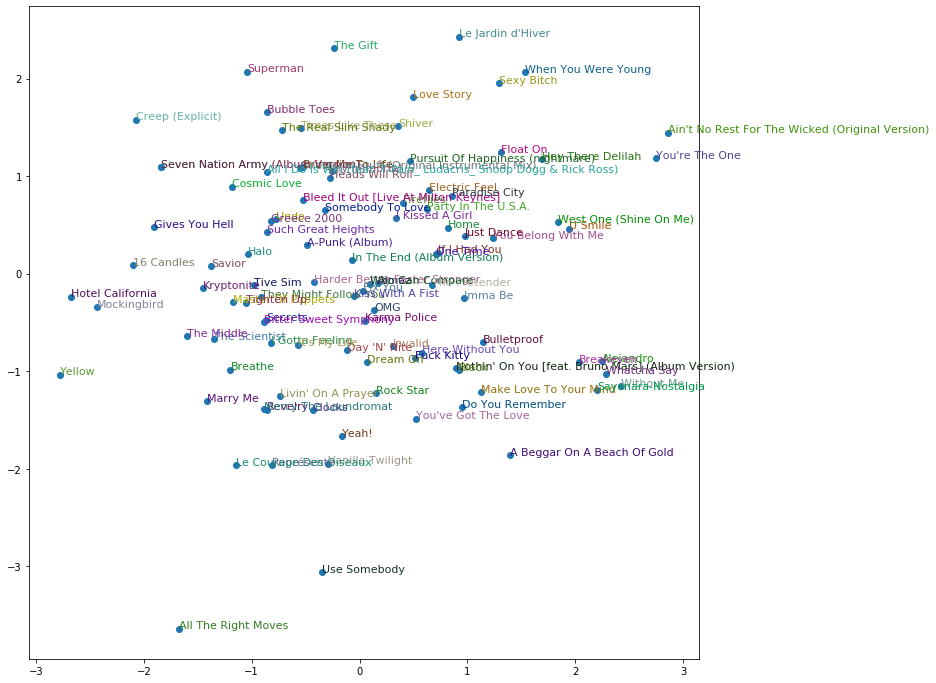

In [98]:
g = merged_data_cleaned2.groupby('title')['listen_count'].count()
top_songs = g.sort_values(ascending=False).index.values[:2000]
top_idxs = torch.tensor([d_title_song[m] for m in top_songs])
song_w = model2.song_factors(top_idxs).cpu().detach()
song_pca = pca(song_w,5)
fac0,fac1,fac2,fac3,fac4 = song_pca.t()
idxs = np.random.choice(len(top_songs), 30, replace=False)
idxs = list(range(100))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_songs[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

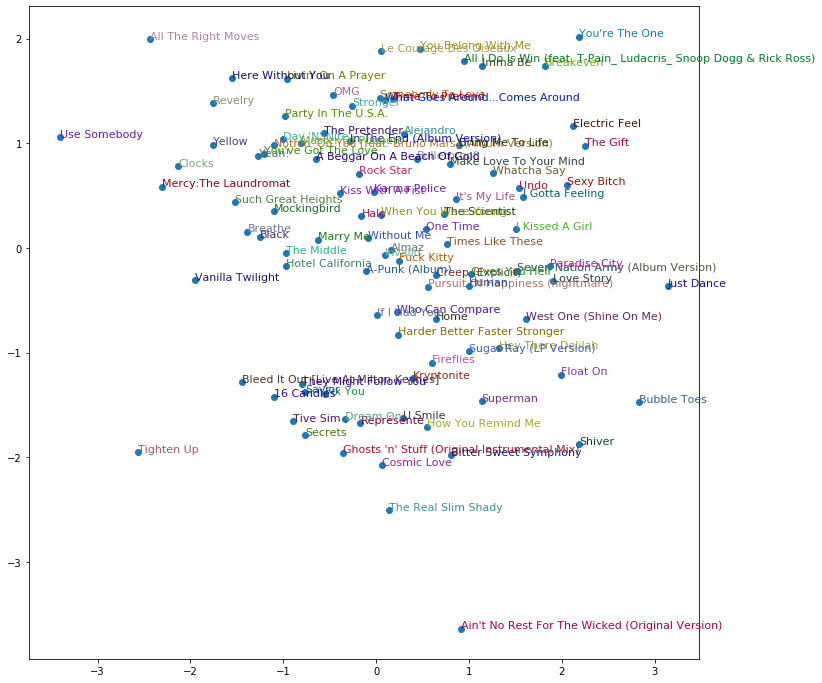

In [79]:
X = fac1[idxs]
Y = fac3[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_songs[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()